# End to end case study - ECommerce Store Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats

In [5]:
customers = pd.read_csv("CUSTOMERS.csv")
sellers = pd.read_csv("SELLERS.csv")
products = pd.read_csv("PRODUCTS.csv")
orders = pd.read_csv("ORDERS.csv")
order_items = pd.read_csv("ORDER_ITEMS.csv")
order_payments = pd.read_csv("ORDER_PAYMENTS.csv")
order_Review_Ratings = pd.read_csv("ORDER_REVIEW_RATINGS.csv")
geolocation = pd.read_csv("GEO_LOCATION.csv")

In [9]:
step1 = pd.merge(orders, order_payments, how="left", left_on=["order_id"],  right_on=["order_id"])
step1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1.0,UPI,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1.0,credit_card,4.0,441.16


In [10]:
step2 = pd.merge(step1, order_Review_Ratings, how="left", left_on=["order_id"],  right_on=["order_id"])
step2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1.0,UPI,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,8/8/2018 0:00,8/8/2018 18:37
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,8/18/2018 0:00,8/22/2018 19:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104481,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,1.0,credit_card,3.0,85.08,e262b3f92d1ce917aa412a9406cf61a6,5,3/22/2017 0:00,3/23/2017 11:02
104482,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4,3/1/2018 0:00,3/2/2018 17:50
104483,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1.0,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5,9/22/2017 0:00,9/22/2017 23:10
104484,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,1/26/2018 0:00,1/27/2018 9:16


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [29]:
percent_missing = step2.isnull().sum() * 100 / len(step2)
missing_value_df = pd.DataFrame({'column_name': step2.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
order_id,order_id,0.000000
customer_id,customer_id,0.000000
order_status,order_status,0.000000
order_purchase_timestamp,order_purchase_timestamp,0.000000
order_approved_at,order_approved_at,0.168444
order_delivered_carrier_date,order_delivered_carrier_date,1.816511
order_delivered_customer_date,order_delivered_customer_date,3.018586
order_estimated_delivery_date,order_estimated_delivery_date,0.000000
payment_sequential,payment_sequential,0.000957
payment_type,payment_type,0.000957


## High level metrics

In [31]:
print ("Total revenue is: " , round(step2.payment_value.sum()))

Total revenue is:  16082866


In [43]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [45]:
products['product_category_name'].nunique()

71

There are 71 total product categories in this e-store.

In [48]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [53]:
order_items.product_id.nunique()

32951

There are 32951 unique products ordered.

In [54]:
order_Review_Ratings.review_id.nunique()

99173

There are 99173 unique reviews posted.

In [56]:
order_payments.payment_type.nunique()

5

There are 5 different modes of payment

In [63]:
order_items.order_item_id.count()

112650

Total quantity sold is 112650

## Data cleaning and typecasting dates 

In [14]:
cleaned =[]
for i in step2['order_purchase_timestamp']:
        cleaned.append(pd.to_datetime(i, format = "%m/%d/%Y %H:%M"))

step2 ['order_purchase_timestamp'] = cleaned

## Customer acquisition/retention

In [108]:
first_occ_customer = step2.drop_duplicates(subset=["customer_id"], keep="first")
first_occ_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1.0,UPI,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,8/8/2018 0:00,8/8/2018 18:37
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,8/18/2018 0:00,8/22/2018 19:07
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,12/3/2017 0:00,12/5/2017 19:21
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,2/17/2018 0:00,2/18/2018 13:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104481,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,1.0,credit_card,3.0,85.08,e262b3f92d1ce917aa412a9406cf61a6,5,3/22/2017 0:00,3/23/2017 11:02
104482,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4,3/1/2018 0:00,3/2/2018 17:50
104483,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,1.0,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5,9/22/2017 0:00,9/22/2017 23:10
104484,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,1/26/2018 0:00,1/27/2018 9:16


The dataframe 'first_occ_customer' contains only the first transaction of a customer so that we can get some idea about when this customer started doing business with the company.

Since the data provided does not have any feature like 'joining date' of customer, we will use this to perform further aggregation and analysis.

In [140]:
month_by_month = first_occ_customer.groupby([first_occ_customer['order_purchase_timestamp'].dt.year, 
                 first_occ_customer['order_purchase_timestamp'].dt.month]).agg({'customer_id': "count"})
month_by_month

customer_id
order_purchase_timestamp order_purchase_timestamp             
2016                     9                                   4
                         10                                324
                         12                                  1
2017                     1                                 800
                         2                                1780
                         3                                2682
                         4                                2404
                         5                                3700
                         6                                3245
                         7                                4026
                         8                                4331
                         9                                4285
                         10                               4631
                         11                               7544
                         12                               5673
2018                     1                                7269
                         2                                6728
                         3                                7211
                         4                                6939
                         5                                6873
                         6                                6167
                         7                                6292
                         8                                6512
                         9                                  16
                         10                                  4

In [169]:
change_per_month = month_by_month.diff()
change_per_month

customer_id
order_purchase_timestamp order_purchase_timestamp             
2016                     9                                 NaN
                         10                              320.0
                         12                             -323.0
2017                     1                               799.0
                         2                               980.0
                         3                               902.0
                         4                              -278.0
                         5                              1296.0
                         6                              -455.0
                         7                               781.0
                         8                               305.0
                         9                               -46.0
                         10                              346.0
                         11                             2913.0
                         12                            -1871.0
2018                     1                              1596.0
                         2                              -541.0
                         3                               483.0
                         4                              -272.0
                         5                               -66.0
                         6                              -706.0
                         7                               125.0
                         8                               220.0
                         9                             -6496.0
                         10                              -12.0

In [141]:
month_by_month_reset = month_by_month.reset_index(level=1)

In [142]:
month_by_month_reset.columns = ['Month_no', 'No_of_cust']

In [165]:
pairlist = [str(i) +" /"+ str(j) for i, j in zip(month_by_month_reset.index, month_by_month_reset['Month_no'])]

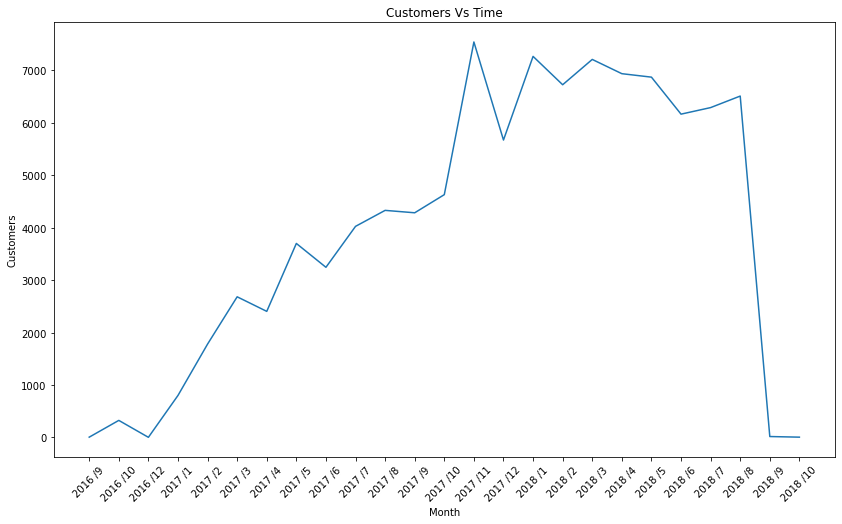

In [166]:
plt.plot(pairlist, list(month_by_month['customer_id']))
plt.title('Customers Vs Time')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.rcParams["figure.figsize"] = (14,8)
plt.xticks(rotation = 45)
plt.show()

Maximum growth in new customers shopping with the company can be seen between 2016 Dec and 2017 March.
Other spike period includese 2017 Oct to 2017 Nov. 
A fall in the number of new customers can be seen between 2018 Aug and Sept.

## Monthly revenues

In [170]:
monthly_rev = step2.groupby([step2['order_purchase_timestamp'].dt.year, 
                             step2['order_purchase_timestamp'].dt.month]).agg({'payment_value': "sum"})
monthly_rev

payment_value
order_purchase_timestamp order_purchase_timestamp               
2016                     9                                252.24
                         10                             59691.38
                         12                                19.62
2017                     1                             139459.77
                         2                             293325.95
                         3                             451859.95
                         4                             418753.06
                         5                             597244.78
                         6                             515436.59
                         7                             596377.93
                         8                             680105.55
                         9                             731128.61
                         10                            784388.93
                         11                           1203518.98
                         12                            881899.52
2018                     1                            1121631.30
                         2                            1004092.09
                         3                            1164189.28
                         4                            1163361.70
                         5                            1154674.66
                         6                            1024877.86
                         7                            1069017.37
                         8                            1022530.02
                         9                               4439.54
                         10                               589.67

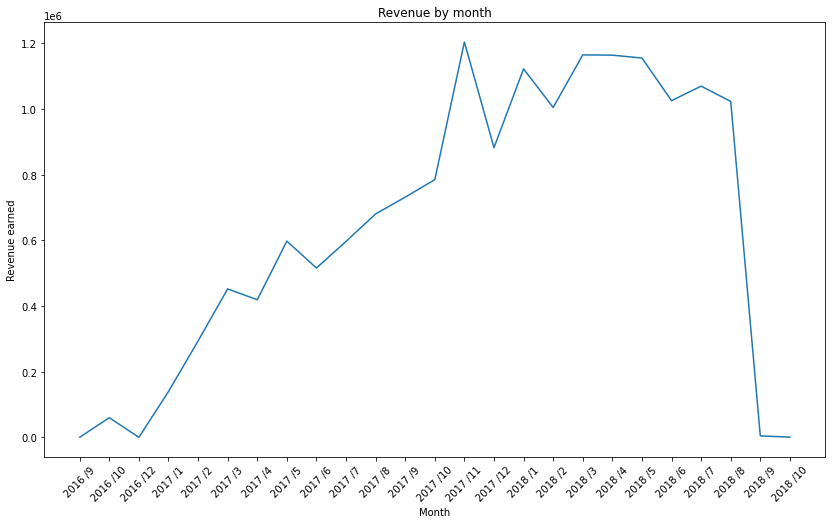

In [172]:
plt.plot(pairlist, list(monthly_rev['payment_value']))
plt.title('Revenue by month')
plt.xlabel('Month')
plt.ylabel('Revenue earned')
plt.rcParams["figure.figsize"] = (14,8)
plt.xticks(rotation = 45)
plt.show()

This line graph shows us the revenue generated each month by the company.

Observation - We can observe that the trend greatly resembles the trend of no. of customers making their first purchase with the company in that month (which we call 'new customer')

Similarly, months with more customers making new purchases had more revenue as well.

The peaks and lowpoints coincided with the previous graph. 

## EDA on products sold by the company

In [382]:
ordered_product_deets = pd.merge(order_items, products, how="left", left_on=["product_id"],  right_on=["product_id"])
ordered_product_deets

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53,Computers_Accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95,Sports_Leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72,Computers_Accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [181]:
categ_prices = ordered_product_deets.groupby(ordered_product_deets['product_category_name']).agg({'price': "mean"})
categ_prices

,price
product_category_name,
Agro_Industry_And_Commerce,342.124858
Air_Conditioning,185.269226
Art,115.802105
Arts_And_Craftmanship,75.583750
Audio,139.254121
...,...
Stationery,91.753369
Tablets_Printing_Image,90.703735
Telephony,71.213978


### Top 5 costliest categories sold here

In [186]:
categ_prices.sort_values(by=['price'], ascending=False).head(5)

,price
product_category_name,
Computers,1098.340542
Small_Appliances_Home_Oven_And_Coffee,624.285658
Home_Appliances_2,476.124958
Agro_Industry_And_Commerce,342.124858
Musical_Instruments,281.616000


### Top 5 cheapest categories sold here

In [187]:
categ_prices.sort_values(by=['price'], ascending=True).head(5)

,price
product_category_name,
Home_Comfort_2,25.342333
Flowers,33.637576
Diapers_And_Hygiene,40.194615
Cds_Dvds_Musicals,52.142857
Food_Drink,54.602446


### Checking if product description length correlates with qty sold of that product

In [264]:
myser = ordered_product_deets['product_id'].value_counts()

In [265]:
desc_lengths = ordered_product_deets[["product_id", "product_description_lenght"]]
desc_lengths = desc_lengths.drop_duplicates(subset=["product_id"], keep = "first")

In [266]:
reordered_series = []
for i in desc_lengths['product_id']:
    reordered_series.append(myser[i])
reordered_series = pd.Series(reordered_series)

In [267]:
desc_lengths = desc_lengths.reset_index()

In [268]:
desc_lengths ['qty_in_orders'] = reordered_series

In [269]:
desc_lengths

,index,product_id,product_description_lenght,qty_in_orders
0,0,4244733e06e7ecb4970a6e2683c13e61,598.0,9
1,1,e5f2d52b802189ee658865ca93d83a8f,239.0,1
2,2,c777355d18b72b67abbeef9df44fd0fd,695.0,3
3,3,7634da152a4610f1595efa32f14722fc,480.0,2
4,4,ac6c3623068f30de03045865e4e10089,409.0,12
...,...,...,...,...
32946,112613,4cc4d02efc8f249c13355147fb44e34d,653.0,1
32947,112619,b10ecf8e33aaaea419a9fa860ea80fb5,308.0,1
32948,112632,dd469c03ad67e201bc2179ef077dcd48,658.0,1
32949,112637,bbe7651fef80287a816ead73f065fc4b,280.0,1


Imputation of missing values in description length

In [272]:
desc_lengths.product_description_lenght = desc_lengths.product_description_lenght.fillna (desc_lengths.product_description_lenght.median())

In [273]:
print(stats.pearsonr(desc_lengths.product_description_lenght, desc_lengths.qty_in_orders))

(0.008637859289323382, 0.11689293572148574)


Observation - We see that there is no significant correlation between the description length and the qty of a product sold.

The null hypothesis has to be accepted, i.e. description length does not affect qty of sales

This was done to test the research question: does a lengthier or more detailed description affect the level of persuasion for a customer while buying online?

### Checking for any seasonality in time of order & payment method

In [281]:
totalrev_by_hour = step2.groupby(step2['order_purchase_timestamp'].dt.hour).agg({'payment_value': "sum"}).reset_index()
totalrev_by_hour.columns = ['hour_of_day', 'total_revenue']

<AxesSubplot:xlabel='hour_of_day', ylabel='total_revenue'>

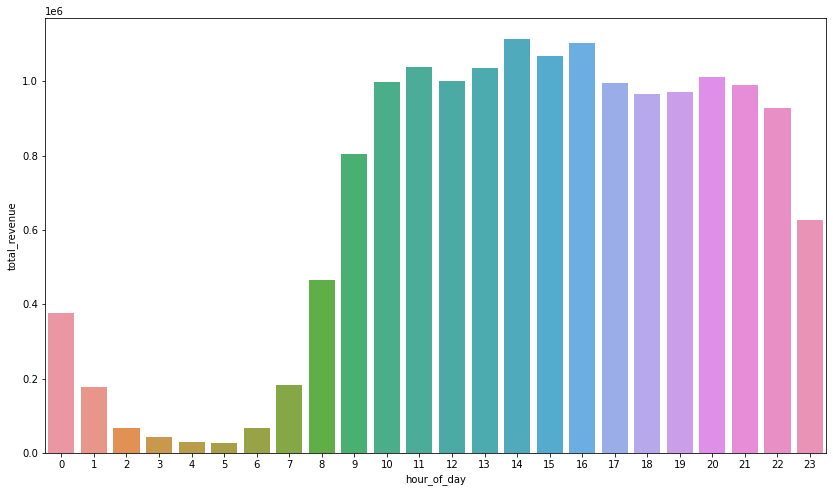

In [282]:
sns.barplot(x="hour_of_day",y="claim_amount",data=totalrev_by_hour)

Observation - More sales were generated in the latter half of the day as we see more customers making purchases in the afternoons and nights.

The first 9 hours of the day did not record much activity which is expected as most people sleep and get ready for work then.

The highest sales were recorded between 2-3 p.m. and 4-5 p.m. while the lowest sales activity between 4-6 a.m.

In [295]:
payment_methods = step2.groupby(step2['payment_type']).agg({'payment_value': "mean"}).reset_index().sort_values(by = "payment_value")

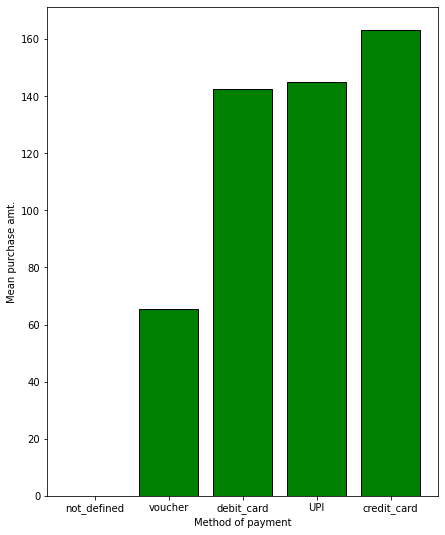

In [305]:
plt.bar(x = payment_methods.payment_type, height = payment_methods.payment_value,
        color="green", edgecolor="black")                              
plt.ylabel("Mean purchase amt.")
plt.xlabel("Method of payment")
plt.rcParams["figure.figsize"] = (6,8)
plt.show()

The above bar graph shows us that credit-cards were used for highest transactions, on average.
Then, UPI and debit cards.
Finally, voucher.

The possible reason for this could be that people wanted to charge high value purchase on credit rather than using their
own debit card.
At second level, it was between debit card and UPI (which comes directly from bank balance) but UPI is more convenient and digital.

Voucher would be least as people gift these to each other usually.

In [291]:
s1 = step2.payment_value.loc[step2['payment_type']=="UPI"]
s2 = step2.payment_value.loc[step2['payment_type']=="credit_card"]
s3 = step2.payment_value.loc[step2['payment_type']=="debit_card"]
s4 = step2.payment_value.loc[step2['payment_type']=="voucher"]
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=385.62837942634087, pvalue=3.9611587872352713e-249)

ANOVA TEST for hypothesis about payment value being related to type of payment method:

H0 : Payment method choices had equal mean order value 

H1 : Payment method choices had different mean order values, affected by payment method

p value = 3.9611587872352713e-249

So, we reject null hypothesis and say the groups had differing mean values (as supported by bar chart)

### Product popularity metrics

#### --> Finding the popular product by month

In [15]:
orders_cust_product = pd.merge(step2,order_items,  how="left", left_on=["order_id"],  right_on=["order_id"])

In [16]:
monthly_popularity = orders_cust_product.groupby([ orders_cust_product['order_purchase_timestamp'].dt.month,
                                                  orders_cust_product['product_id']])["product_id"].count() 
monthly_popularity

order_purchase_timestamp  product_id                      
1                         001c5d71ac6ad696d22315953758fa04    1
                          002959d7a0b0990fe2d69988affcbc80    2
                          0043c62d00db47eff6a6bc4cf6bfaeda    1
                          005030ef108f58b46b78116f754d8d38    1
                          005c6b24cc96dca3e2c01e824401030e    1
                                                             ..
12                        ffc0b406806006602c5853b00ab5f7fd    1
                          ffce5ed9e0bcc2e46796b988cdac733b    1
                          ffcfaba393e8ef71937c6e8421bc2868    1
                          ffd34459c21034d1da6df9800de0d7a3    1
                          fff0a542c3c62682f23305214eaeaa24    7
Name: product_id, Length: 60796, dtype: int64

In [18]:
monthlydf = monthly_popularity.to_frame()
monthlydf.columns = ['qty']

monthlydf = monthlydf.reset_index()

In [42]:
best_prod_by_month = monthlydf.groupby(["order_purchase_timestamp"]).max().reset_index()
best_prod_by_month

,order_purchase_timestamp,product_id,qty
0,1,ffe0fc4e02c3559643ac063fa5cf9d07,124
1,2,ffeb228c521d5464d1f71444da96c446,72
2,3,ffd4bf4306745865e5692f69bd237893,65
3,4,fffdb2d0ec8d6a61f0a0a0db3f25b441,88
4,5,fffe9eeff12fcbd74a2f2b007dde0c58,115
5,6,ffef256879dbadcab7e77950f4f4a195,76
6,7,fff81cc3158d2725c0655ab9ba0f712c,71
7,8,fffdb2d0ec8d6a61f0a0a0db3f25b441,75
8,9,fff6177642830a9a94a0f2cba5e476d1,38
9,10,fff9553ac224cec9d15d49f5a263411f,42


In [44]:
pd.merge(best_prod_by_month, products, how="left", left_on=["product_id"],  right_on=["product_id"]).iloc[:,0:4]

,order_purchase_timestamp,product_id,qty,product_category_name
0,1,ffe0fc4e02c3559643ac063fa5cf9d07,124,Housewares
1,2,ffeb228c521d5464d1f71444da96c446,72,Telephony
2,3,ffd4bf4306745865e5692f69bd237893,65,Fashion_Bags_Accessories
3,4,fffdb2d0ec8d6a61f0a0a0db3f25b441,88,Computers_Accessories
4,5,fffe9eeff12fcbd74a2f2b007dde0c58,115,Toys
5,6,ffef256879dbadcab7e77950f4f4a195,76,Christmas_Supplies
6,7,fff81cc3158d2725c0655ab9ba0f712c,71,Health_Beauty
7,8,fffdb2d0ec8d6a61f0a0a0db3f25b441,75,Computers_Accessories
8,9,fff6177642830a9a94a0f2cba5e476d1,38,Cool_Stuff
9,10,fff9553ac224cec9d15d49f5a263411f,42,Fashion_Bags_Accessories


Observation - We can see that every month, the "most popular product" belonged to a different category.

Towards the end of the year, "stationery" was being bought more.

The anomaly was that June had 'Christmas_Supplies' as the most popular, which could mean that either people wanted to buy christmas supplies in advance to avoid surcharges, OR it could mean that some item like light decor or party food was just labelled as  Christmas_Supplies by the company. 



#### --> Finding the popular product by state

In [62]:
products_by_state = pd.merge( orders_cust_product, customers,  how="left", left_on=["customer_id"],  right_on=["customer_id"])
products_by_state = products_by_state[["product_id", "customer_state"]]

In [69]:
product_qty_state = products_by_state.groupby([ products_by_state['customer_state'] , 
                            products_by_state['product_id']])["product_id"].count().to_frame()
product_qty_state

product_id
customer_state product_id                                  
Andhra Pradesh 00088930e925c41fd95ebfe695fd2655           1
               0009406fd7479715e4bef61dd91f2462           1
               000b8f95fcb9e0096488278317764d19           1
               000d9be29b5207b54e86aa1b1ac54872           1
               0011c512eb256aa0dbbb544d8dffcf6e           1
...                                                     ...
West Bengal    fbce4c4cb307679d89a3bf3d3bb353b9           1
               fe05ad488982d6de6373f13486d92d99           1
               fe6a9515d655fa7936b8a7c841039f34           1
               ffaf0af7eebb57c7f262b51ebb05dfd6           4
               ffd9ac56db9194a413298faaa03cd176           1

[55205 rows x 1 columns]

In [74]:
product_qty_state.columns = ["Qty"]
product_qty_state = product_qty_state.reset_index()

In [106]:
maxqty = product_qty_state.groupby('customer_state')[['Qty']].max()
bestprod_bystate = pd.merge(maxqty,product_qty_state, how='left',left_on=["Qty", "customer_state"],  right_on=["Qty","customer_state"]  )

In the below table we can see the most popular product in each state (with ties, if applicable).

In [107]:
pd.merge(bestprod_bystate, products, how="left", left_on=["product_id"],  right_on=["product_id"]).iloc[:,0:4]

,Qty,customer_state,product_id,product_category_name
0,346,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor
1,12,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,Housewares
2,42,Chhattisgarh,422879e10f46682990de24d770e7f83d,Garden_Tools
3,25,Delhi,53759a2ecddad2bb87a079a1f1519f73,Garden_Tools
4,1,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,Office_Furniture
5,1,Goa,3db53484d668b78b3bbefe2f430df477,Construction_Tools_Construction
6,1,Goa,54d9ac713e253fa1fae9c8003b011c2a,Cool_Stuff
7,1,Goa,99ba5fbf3ae895fe3a9289acd0a5eb91,Telephony
8,1,Goa,a29c670cb6c4fb685d04410dbbd6d5b2,Musical_Instruments
9,1,Goa,a50acd33ba7a8da8e9db65094fa990a4,Auto


By observation, we see that "Furniture_Decor" seems to be popular in many states as the most bought category followed by "Garden_Tools".




### Analyzing reviews ratings given by customers

In [112]:
cleaned =[]
for i in step2['order_delivered_carrier_date']:
        cleaned.append(pd.to_datetime(i, format = "%m/%d/%Y %H:%M"))

step2 ['order_delivered_carrier_date'] = cleaned

cleaned =[]
for i in step2['order_delivered_customer_date']:
        cleaned.append(pd.to_datetime(i, format = "%m/%d/%Y %H:%M"))

step2 ['order_delivered_customer_date'] = cleaned

cleaned =[]
for i in step2['order_estimated_delivery_date']:
        cleaned.append(pd.to_datetime(i, format = "%m/%d/%Y %H:%M"))

step2 ['order_estimated_delivery_date'] = cleaned

In [119]:
step2['purchase_to_customer'] = (step2['order_delivered_customer_date'] - step2['order_purchase_timestamp']).dt.days

In [121]:
step2['days_before_estimate'] = (step2 ['order_estimated_delivery_date']  - step2['order_delivered_customer_date']).dt.days

In [124]:
tracking_days_df = step2 [["order_id", "purchase_to_customer", "days_before_estimate", "review_score"]]

### Feature engineering

I created 2 new variables using existing variables.

The below dataframe shows how many days it took from purchase to delivery , and how many days prior to the estimated delivery the shipment was completed.

purchase_to_customer: days between order_delivered_customer_date and order_purchase_timestamp

days_before_estimate : days between order_delivered_customer_date and order_estimated_delivery_date
    
There is also a review score for that order.

In [125]:
tracking_days_df


,order_id,purchase_to_customer,days_before_estimate,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,7.0,4
1,e481f51cbdc54678b7cc49136f2d6af7,8.0,7.0,4
2,e481f51cbdc54678b7cc49136f2d6af7,8.0,7.0,4
3,53cdb2fc8bc7dce0b6741e2150273451,13.0,5.0,4
4,47770eb9100c2d0c44946d9cf07ec65d,9.0,17.0,5
...,...,...,...,...
104481,9c5dedf39a927c1b2549525ed64a053c,8.0,10.0,5
104482,63943bddc261676b46f01ca7ac2f7bd8,22.0,1.0,4
104483,83c1379a015df1e13d02aae0204711ab,24.0,5.0,5
104484,11c177c8e97725db2631073c19f07b62,17.0,20.0,2


In [178]:
tracking_days_df = tracking_days_df.drop_duplicates()

<AxesSubplot:xlabel='review_score'>

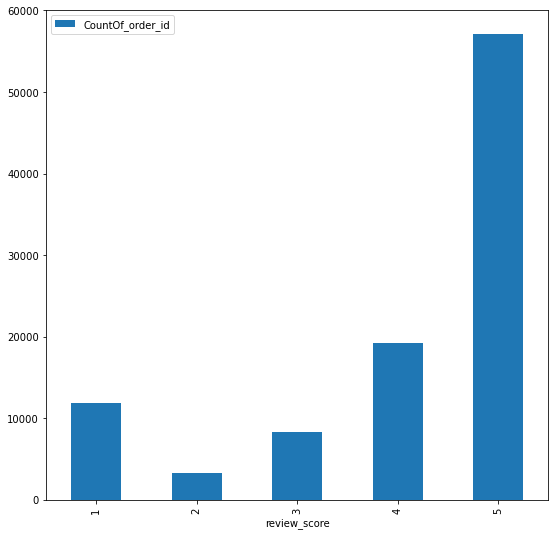

In [179]:
scorefreq = tracking_days_df.groupby(by="review_score")[["order_id"]].count().add_prefix("CountOf_")
scorefreq.plot(kind = "bar")


The below charts are histograms to show the distribution of our data.


(-10.0, 100.0)

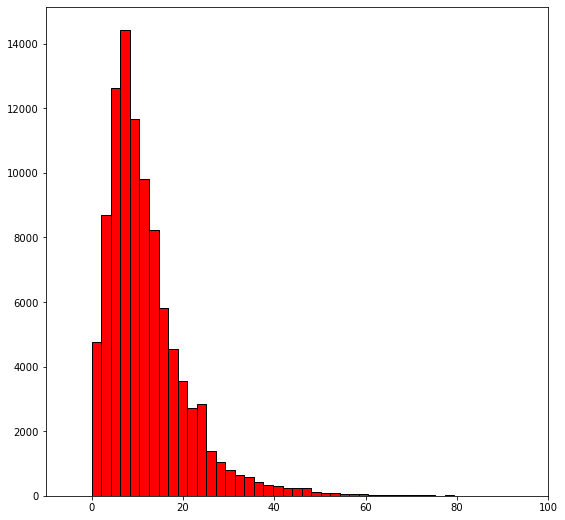

In [180]:
plt.hist(tracking_days_df['purchase_to_customer'],bins=100,edgecolor="black", color = 'red')
plt.xlim([-10,100])

Maximum orders were delivered to the customer in approx. 10 days

(-80.0, 80.0)

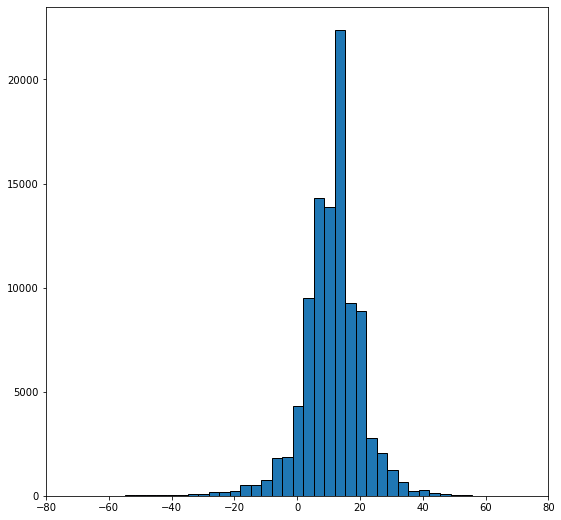

In [181]:
plt.hist(tracking_days_df['days_before_estimate'],bins=100,edgecolor="black")
plt.xlim([-80,80])

Maximum orders were delivered to the customer in approx. 8-10 days before the estimated delivery date.
There is almost even distribution of the extreme datapoints i.e. highly negative and highly positive side of the x axis. This shows that there is roughly equal number of orders which were delivered with high delays and orders which were delivered with high speed.

#### Testing a hypothesis :
I wish to see if the speed of deliveries has an effect on the reviews given by the customer. 
That is, to see whether higher ratings are given to those orders which were either delivered fast in absolute figures, or delivered fast compared to the estimated delivery.

In [191]:
without_na_track = tracking_days_df.dropna(subset=['purchase_to_customer', 'days_before_estimate'])

In [196]:
print(stats.pearsonr(without_na_track['purchase_to_customer'], without_na_track['review_score']))
print(stats.pearsonr(without_na_track['days_before_estimate'], without_na_track['review_score']))

(-0.33465303263457297, 0.0)
(0.26857678126974993, 0.0)


The p value is low in this case < 0.05 so the correlation obtained is significant (rejection of null hypothesis H0 that review score has no correlation with the other variable).

However, the r value is -0.33 and 0.27 which means it is not a very strong relationship.

We can say that when orders were delivered before time, it 'slightly' corrrelated with higher ratings, and when orders were delivered in more no. of days, it correlated with lower ratings.

## Customer segmentation

In [204]:
revenue_per_customer = step2.groupby([step2['customer_id']]).agg({'payment_value': "sum"}).sort_values(by = "payment_value", ascending = 0)
revenue_per_customer 

,payment_value
customer_id,
1617b1357756262bfa56ab541c47bc16,13664.08
ec5b2ba62e574342386871631fafd3fc,7274.88
c6e2731c5b391845f6800c97401a43a9,6929.31
f48d464a0baaea338cb25f816991ab1f,6922.21
3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
...,...
a790343ca6f3fee08112d678b43aa7c5,9.59
3532ba38a3fd242259a514ac2b6ae6b6,0.00
86dc2ffce2dfff336de2f386a786e574,0.00


Getting a closer view of the majority of the datapoints

(0.0, 2000.0)

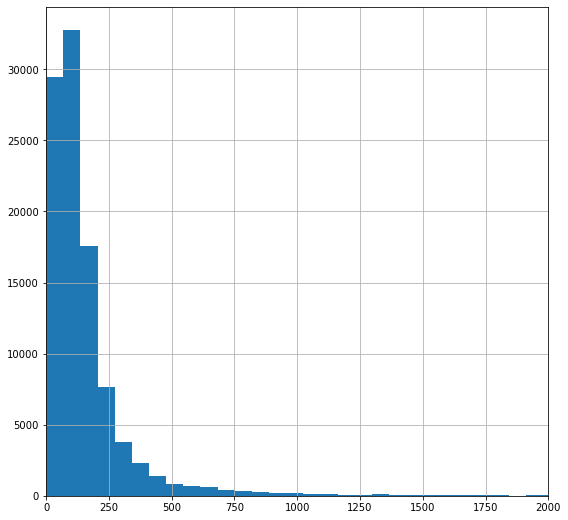

In [217]:
revenue_per_customer['payment_value'].hist(bins=200)
plt.xlim([0,2000])

In [225]:
print ("0th percentile = ", np.percentile(revenue_per_customer , 0))
print ("5th percentile = ", np.percentile(revenue_per_customer , 5))
print ("25th percentile = ", np.percentile(revenue_per_customer , 25))
print ("50th percentile = ", np.percentile(revenue_per_customer , 50))
print ("75th percentile = ", np.percentile(revenue_per_customer , 75))
print ("95th percentile = ", np.percentile(revenue_per_customer , 95))
print ("100th percentile = ", np.percentile(revenue_per_customer , 100))

0th percentile =  0.0
5th percentile =  32.38
25th percentile =  62.21
50th percentile =  105.7
75th percentile =  177.59
95th percentile =  455.82
100th percentile =  13664.08


In [287]:
binned_output = pd.cut(revenue_per_customer.payment_value,
                             bins = [-1, 200,400,600,800,1000,1200,1400, 15000],
                            labels = ['A', 'B', 'C', 'D', 'E', 'F' , 'G', 'H']) 

In [288]:
revenue_per_customer['customer_category'] = binned_output

NOTE ON SEGMENTATION:
In this large dataset, I have formed 8 different groups at equal intervals based on the revenue generated by the customer for the company.

The 8 groups have been formed based on intervals of 200. The final group (H) however represents all values 1400+. 

The groups have been labelled A to H with A representing the bottom-most group and then successively increasing to H.

In [289]:
revenue_per_customer = revenue_per_customer.reset_index()
revenue_per_customer

,level_0,index,customer_id,payment_value,customer_category
0,0,0,1617b1357756262bfa56ab541c47bc16,13664.08,H
1,1,1,ec5b2ba62e574342386871631fafd3fc,7274.88,H
2,2,2,c6e2731c5b391845f6800c97401a43a9,6929.31,H
3,3,3,f48d464a0baaea338cb25f816991ab1f,6922.21,H
4,4,4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,H
...,...,...,...,...,...
99436,99436,99436,a790343ca6f3fee08112d678b43aa7c5,9.59,A
99437,99437,99437,3532ba38a3fd242259a514ac2b6ae6b6,0.00,A
99438,99438,99438,86dc2ffce2dfff336de2f386a786e574,0.00,A
99439,99439,99439,197a2a6a77da93f678ea0d379f21da0a,0.00,A


In [290]:
category_vs_geography = pd.merge (revenue_per_customer, customers, how = 'left', left_on=["customer_id"],  right_on=["customer_id"])

In [291]:
category_vs_geography = category_vs_geography[['customer_id', 'payment_value', 'customer_category', 'customer_state']]

In [292]:
grouped_geog = category_vs_geography.groupby(['customer_category', 'customer_state']).agg({'customer_id': "count"})

In [293]:
grouped_geog

customer_id
customer_category customer_state                
A                 Andhra Pradesh           48856
                  Arunachal Pradesh          863
                  Chhattisgarh              5011
                  Delhi                     2562
                  Goa                          9
...                                          ...
H                 Rajasthan                    5
                  Tamil Nadu                  11
                  Uttar Pradesh                3
                  Uttaranchal                  0
                  West Bengal                  3

[160 rows x 1 columns]

In [294]:
pivottable = grouped_geog.reset_index().pivot(index="customer_category",columns="customer_state",values="customer_id")
pivottable

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
customer_category,,,,,,,,,,,,,,,,,,,,
A,48856,863,5011,2562,9,5841,1745,573,1194,3035,1221,2195,1548,473,528,615,1616,780,77,271
B,8290,177,910,523,1,1137,308,120,233,586,225,447,326,106,110,127,349,180,13,59
C,1693,39,194,103,0,222,70,23,53,121,33,98,58,18,26,26,70,33,4,22
D,805,21,97,64,0,114,31,15,30,40,24,47,31,10,6,16,37,17,1,5
E,388,8,47,29,0,55,19,5,14,31,10,28,14,5,4,10,15,10,2,4
F,196,5,26,13,0,31,10,3,4,17,3,15,8,5,1,5,12,3,0,2
G,152,2,16,12,0,21,2,0,5,16,3,6,8,5,2,4,12,7,0,3
H,308,4,54,26,0,46,17,4,4,20,12,17,12,3,2,5,11,3,0,3


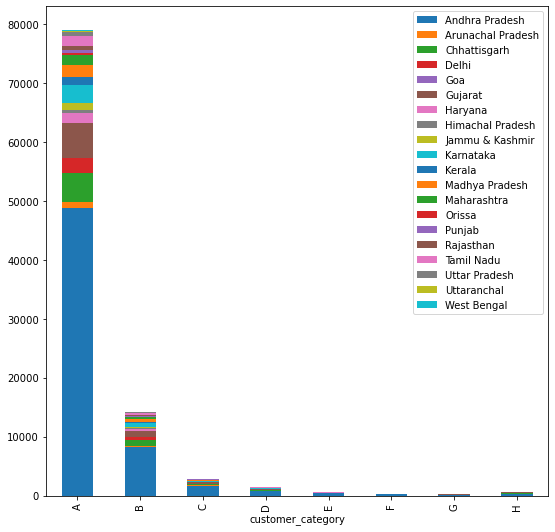

In [295]:
pivottable.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=(1,1))

#### Observation: 
We see a uniform trend in the distribution of states across the revenue categories.
    
For all the binned revenue labels, the top 5 states by numbers (in order) were: Andhra Pradesh, Maharashtra, Gujarat, Karnataka and Haryana.

## Seller segmentation

In [301]:
seller_seg_df = pd.merge(step2,ordered_product_deets, how='left', left_on=["order_id" ],  right_on=["order_id" ] )

In [305]:
seller_seg_df = seller_seg_df[["seller_id","payment_value" ]]
rev_by_seller = seller_seg_df.groupby([seller_seg_df['seller_id']]).agg({'payment_value': "sum"}).sort_values(by = "payment_value", ascending = 0)

(0.0, 30000.0)

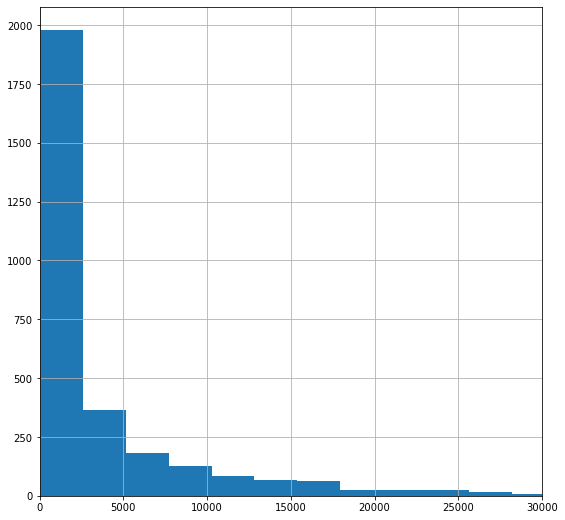

In [309]:
rev_by_seller['payment_value'].hist(bins=200)
plt.xlim([0,30000])

Above histogram gives a closer view of the majority of the datapoints which are < 30,000

In [322]:
sellerbins = pd.cut(rev_by_seller.payment_value,
                             bins  = [-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 1000000],
                            labels = ['A', 'B', 'C', 'D', 'E', 'F' , 'G', 'H', 'I', "J"])

In [323]:
rev_by_seller['seller_category'] = sellerbins

In [324]:
rev_by_seller

,payment_value,seller_category
seller_id,,
7c67e1448b00f6e969d365cea6b010ab,512645.19,J
1025f0e2d44d7041d6cf58b6550e0bfa,312456.49,J
4a3ca9315b744ce9f8e9374361493884,306138.80,J
1f50f920176fa81dab994f9023523100,291918.98,J
53243585a1d6dc2643021fd1853d8905,284903.08,J
...,...,...
ad14615bdd492b01b0d97922e87cb87f,19.21,A
702835e4b785b67a084280efca355756,18.56,A
4965a7002cca77301c82d3f91b82e1a9,16.36,A


NOTE ON SEGMENTATION:
In this large dataset, I have formed 10 different groups at equal intervals based on the revenue generated by each seller.

The 10 groups have been formed based on intervals of 1000. The final group (J) however represents all values 9000+. 

The groups have been labelled A to H with A representing the bottom-most group and then successively increasing to H. The last group has a large range but only includes small part of the population.

In [325]:
rev_by_seller = rev_by_seller.reset_index()

In [326]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [327]:
seller_vs_geography = pd.merge (rev_by_seller, sellers, how = 'left', left_on=["seller_id"],  right_on=["seller_id"])

In [328]:
seller_vs_geography = seller_vs_geography[['seller_id', 'payment_value', 'seller_category', 'seller_state']]

In [329]:
grouped_state_sellers = seller_vs_geography.groupby(['seller_category', 'seller_state']).agg({'seller_id': "count"})

In [331]:
pivottablesl = grouped_state_sellers.reset_index().pivot(index="seller_category",columns="seller_state",values="seller_id")
pivottablesl

seller_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
seller_category,,,,,,,,,,,,,,,,,,,
A,923,10,98,44,91,28,4,19,55,9,16,14,6,11,9,24,4,0,2
B,296,1,27,16,21,11,2,15,12,3,12,9,0,2,1,7,2,0,2
C,145,2,15,3,19,3,0,4,7,3,5,1,0,1,1,0,1,0,1
D,97,0,11,3,7,3,2,0,5,1,1,4,1,0,0,2,0,0,2
E,85,2,9,4,9,2,1,1,4,0,3,0,1,1,0,2,4,1,0
F,55,2,3,2,8,2,0,1,5,1,2,1,0,0,1,2,0,0,0
G,53,0,5,1,3,3,0,2,2,0,0,0,0,0,1,2,0,0,0
H,40,1,4,2,8,0,1,1,1,0,0,0,0,0,1,1,0,0,0
I,43,1,3,3,5,0,2,0,1,0,1,0,0,0,0,1,0,0,0


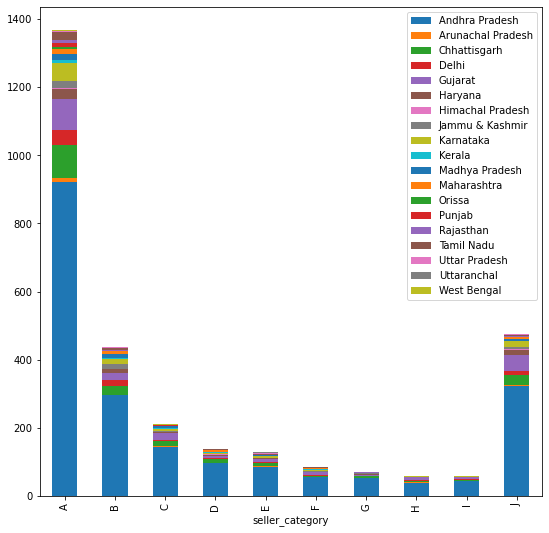

In [332]:
pivottablesl.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=(1,1))

#### Observation: 

The bar graph above shows us that maximum no. of sellers made revenue of under 1000. After which, it successively decreased. 

The no. of sellers making a revenue of 1000-2000 was approximately equal to no. of sellers making revenue 9000+

We see the distribution of states across the revenue categories:
    
Across the seller groups, the top 5 states by numbers (in order) were: Andhra Pradesh, Chhatisgarh, Gujarat, Karnataka and Delhi.

There are some overlaps with customer segmentation analysis (such as Andhra and Gujarat) while some unique to customers (Maharashtra) and some unique to sellers (Delhi)

## Analyzing cross-selling

In [343]:
crossdf = pd.merge (order_items, products, how = 'left', left_on=["product_id"],  right_on=["product_id"])


In [347]:
multiorders = crossdf[crossdf['order_id'].duplicated(keep = False)]
multiorders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2/21/2018 2:55,49.90,13.37,Garden_Tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2/21/2018 2:55,49.90,13.37,Garden_Tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,10/20/2017 16:07,21.33,15.10,Sports_Leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,10/20/2017 16:07,21.33,15.10,Sports_Leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,10/20/2017 16:07,21.33,15.10,Sports_Leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,3/27/2018 12:29,180.00,48.14,Computers_Accessories,53.0,871.0,4.0,175.0,20.0,20.0,20.0
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,Watches_Gifts,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,Watches_Gifts,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,Watches_Gifts,41.0,1159.0,4.0,350.0,16.0,14.0,11.0


Note - multiorders is the dataframe that contains all those transactions which had more than 1 product bought within the same order level.

In [351]:
multiorders_cleaned = multiorders.dropna()

In [353]:
combo_strings = multiorders_cleaned.groupby('order_id') ['product_category_name'].transform(lambda i: ' ; '.join(i))

In [357]:
multiorders_cleaned['Combos'] = combo_strings

/var/folders/jt/dpcpyp4n5mggjjbh2lylsglh0000gn/T/ipykernel_57441/3440186760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiorders_cleaned['Combos'] = combo_strings


The dataframe below shows the products bought in combination for each order

In [360]:
df_combos = multiorders_cleaned[['order_id', 'Combos']].drop_duplicates()
df_combos

,order_id,Combos
13,0008288aa423d2a3f00fcb17cd7d8719,Garden_Tools ; Garden_Tools
32,00143d0f86d6fbd9f9b38ab440ac16f5,Sports_Leisure ; Sports_Leisure ; Sports_Leisure
42,001ab0a7578dd66cd4b0a71f5b6e1e41,Electronics ; Electronics ; Electronics
48,001d8f0e34a38c37f7dba2a37d4eba8b,Health_Beauty ; Health_Beauty
75,002c9def9c9b951b1bec6d50753c9891,Housewares ; Housewares
...,...,...
112579,ffd84ab39cd5e873d8dba24342e65c01,Computers_Accessories ; Computers_Accessories
112603,ffe4b41e99d39f0b837a239110260530,Toys ; Toys
112615,ffecd5a79a0084f6a592288c67e3c298,Electronics ; Electronics ; Electronics
112634,fff8287bbae429a99bb7e8c21d151c41,Computers_Accessories ; Computers_Accessories


The result below shows the top-25 combinations for the company.

In [377]:
df_combos["Combos"].value_counts().sort_values().tail(25)

Garden_Tools ; Garden_Tools ; Garden_Tools                                 76
Housewares ; Housewares ; Housewares                                       85
Sports_Leisure ; Sports_Leisure ; Sports_Leisure                           86
Cool_Stuff ; Cool_Stuff                                                    86
Computers_Accessories ; Computers_Accessories ; Computers_Accessories     101
Baby ; Baby                                                               102
Fashion_Bags_Accessories ; Fashion_Bags_Accessories                       111
Electronics ; Electronics                                                 119
Stationery ; Stationery                                                   144
Office_Furniture ; Office_Furniture                                       145
Pet_Shop ; Pet_Shop                                                       145
Toys ; Toys                                                               158
Bed_Bath_Table ; Bed_Bath_Table ; Bed_Bath_Table                

In [378]:
df_combos["Combos"].value_counts().sort_values().head(5)

Housewares ; Housewares ; Housewares ; Bed_Bath_Table ; Housewares              1
Cine_Photo ; Sports_Leisure                                                     1
Costruction_Tools_Garden ; Telephony                                            1
Housewares ; Electronics ; Housewares ; Housewares ; Housewares ; Housewares    1
Electronics ; Small_Appliances                                                  1
Name: Combos, dtype: int64

#### Observation: 

The result above shows us that maximum no. of combination orders comprised of 'Bed_Bath_Table' products bought together (over 1k orders).

Another key observation is that for cross-selling, the trend shows that cross-selling works best for products of the same category. This means that in this customer base, customers preferred buying various items of the same category under 1 order. 

Cross-selling across categories is rare, but seen in low numbers.

For e.g. there are instances of people buying "Electronics ; Small_Appliances" together, or "Cine_Photo ; Sports_Leisure" together (but not popular).

### Analyzing customer satisfaction on prod / categ. level

In [387]:
product_ratings = pd.merge(ordered_product_deets, order_Review_Ratings, how = 'left', left_on = 'order_id',right_on = 'order_id')

#### Top 8 categories, by customer ratings 

In [394]:
product_ratings.groupby("product_category_name").agg({'review_score': 'mean'}).sort_values(by = 'review_score').tail(8)

,review_score
product_category_name,
Food_Drink,4.303571
Luggage_Accessories,4.309524
Books_Technical,4.338290
Costruction_Tools_Tools,4.359223
Books_Imported,4.400000
Books_General_Interest,4.439421
Fashion_Childrens_Clothes,4.500000
Cds_Dvds_Musicals,4.642857


#### Bottom 8 categories, by customer ratings 

In [401]:
product_ratings.groupby("product_category_name").agg({'review_score': 'mean'}).sort_values(by = 'review_score').head(8)

,review_score
product_category_name,
Security_And_Services,2.500000
Diapers_And_Hygiene,3.256410
Home_Comfort_2,3.366667
Office_Furniture,3.484421
Fashion_Male_Clothing,3.621212
Fixed_Telephony,3.671698
Party_Supplies,3.767442
Fashio_Female_Clothing,3.780000


#### Top products (i.e. with highest score), by customer ratings 

In [400]:
product_level_score = product_ratings.groupby("product_id").agg({'review_score': 'mean'})
product_level_score[product_level_score['review_score'] == 5]

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
00126f27c813603687e6ce486d909d01,5.0
001b237c0e9bb435f2e54071129237e9,5.0
...,...
ffe8083298f95571b4a66bfbc1c05524,5.0
ffe9468f4d890db80b7231e86931ff37,5.0
ffeb228c521d5464d1f71444da96c446,5.0


#### Worst products (i.e. with lowest score), by customer ratings 

In [406]:
product_level_score[product_level_score['review_score'] <= 1]

,review_score
product_id,
0009406fd7479715e4bef61dd91f2462,1.0
0011c512eb256aa0dbbb544d8dffcf6e,1.0
002d4ea7c04739c130bb74d7e7cd1694,1.0
0043c62d00db47eff6a6bc4cf6bfaeda,1.0
0043d1a25ef08fb6f41b8fa6f91742ab,1.0
...,...
ffbc83054b3741a8d67fc59d9cf9d42d,1.0
ffbfa9e143fda4420454d0f4e88a3cd5,1.0
ffedbd68fa6f44e788ff6c2db8094715,1.0


#### Observation: 

We see that the highest ratings were for the categories such as Books_General_Interest, Fashion_Childrens_Clothes,
Cds_Dvds_Musicals. In the top 8 categories, different types of books seemed to be the common pattern.

The lowest ratings were for categories such as Diapers_And_Hygiene, Fashion_Male_Clothing, Fixed_Telephony, Party_Supplies, Fashio_Female_Clothing. In the bottom 8 categories, the common pattern seemed to be items related to clothing for babies and adults.

## Final summary report for case-study

Through this project, we were able to leverage a complex schema for the database and use joins to extract key insights from multiple tables. This allowed for exploratory data analysis, visualizations and further analysis with the help of the guiding questions provided and personal questions which were extensions from the requirements.

One remark is that the database management of this company should definitely be improved because the dataset had various missing datapoints which could not be imputed because of their subjective, categorical nature.

##### Insights:

1) At a high level,
- Total revenue of the records present in the database = 16082866 
- Total no. of categories kept by the store = 71
- Total no. of products = 32951
- Total customer reviews = 99173
- Total qty of items ordered = 112650
- Totaal no. of payment modes = 5

For further analysis, there had to be sufficient data cleaning done. This included treating missing values, typecasting, changing format of columns, merging and joining.

Note: All graphs and visualizations are already in the notebook

2) Customer joining and retention
- Maximum growth in new customers between 2016 Dec and 2017 March
- Other spike period includes 2017 Oct to 2017 Nov. 
- A fall in the number of new customers between 2018 Aug and Sept.

3) Revenue trends
- Peaks and dips in the monthly revenue generated coincided with the graph for customer influx so this should be kept in mind.
- Growth: 2016 Dec to 2017 March; 2017 Oct to 2017 Nov
- Fall: 2018 Aug to 2018 Sept

4) Categories
- The most expensive categories are Computers, Small_Appliances_Home_Oven_And_Coffee, Home_Appliances_2
- The cheapest categories are Home_Comfort_2, Flowers , Diapers_And_Hygiene

5) Hypothesis testing about product description length and ratings
- We see that there is no significant correlation between the description length and the qty of a product sold.

6) Seasonality
- Highest sales between 2-3 p.m. and 4-5 p.m.
- Lowest sales  between 4-6 a.m.

7) Hypothesis testing about purchase amt. and mode of payment
- Found that mean puchase amt. affected the mode of payment
- Highest mean was for credit card purchases (ANOVA test)

8) Product popularity (by month)
- There was a different popular category in each month, so refer to table previously in notebook

9) Product popularity (by state)
- refer to table previously in notebook for each state's results
- "Furniture_Decor" seems to be popular in many states as the most bought category followed by "Garden_Tools"

Feature engineering performed to use no. of days spent in various stages of the order cycle.

10) Order delivery life cycle
- various histograms in notebook above to see these metrics
- very slight negative correlation between no. of days taken to deliver and no. of stars given to rating

11) Segmentation (customers & sellers)
- Large range seen with very high outlying values
- Most customers were in below 200 group (i.e. customer group A)
- Across the segments, major states were Andhra Pradesh, Maharashtra, Gujarat, Karnataka and Haryana

- Most sellers were in below 1000 group (i.e. seller group A)
- top 5 states by numbers (in order) were: Andhra Pradesh, Chhatisgarh, Gujarat, Karnataka and Delhi.

12) Cross selling data processing & analysis
- Customers preferred buying various items of the same category under 1 order
- Maximum no. of combination orders comprised of 'Bed_Bath_Table' products

13) Customer satisfaction
- The specific categories are listed in the notebook
- In the top 8 categories, different types of books seemed to be the common pattern.
- In the bottom 8 categories, the common pattern seemed to be items related to clothing for babies and adults.

##### Sample actions which company can take from insights:
- Introduce schemes and discounts in the periods when customer retention was low
- Invite more sellers specially in periods of low sales
- Increase inventory of products with most qty. sold
- Increase ads and visibility during the peak times found above
- Track orders more effectively to reduce delivery time and optimize ratings
- Optimize product description length to allow for efficient buying & selling because as of now, it is not influencing the decisions in any way
- Boost growth in the segments where high-revenue was coming from (identified states of India)
- Create seller warehouses in states which are high on seller revenue; have more delivery partners in states which are high on customer revenue